In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.contrib.eager as tfe
%load_ext autoreload
%autoreload 2

/Users/alanluu2/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
cd ..

/Users/alanluu2/Research/MCMC


In [2]:
tfe.enable_eager_execution()

In [257]:
from utils.distributions import Gaussian
from utils.ensembles import CanonicalEnsemble
from utils.initializers import ConstantInitializer
from utils.kernels import GaussianKernel
from utils.profilers import Profiler
from utils.systems import System
from utils.walkers import SingleWalker

In [258]:
sigma = tf.constant([[1, 0], [0, 1]], dtype='float32')

mu = tf.constant([[0,0]], dtype='float32')

init = tf.constant([[4,4]], dtype='float32')

gaussian = Gaussian(mu, sigma)

ensemble = CanonicalEnsemble()

initializer = ConstantInitializer(x=init)

kernel = GaussianKernel(sigma)

profiler = Profiler()

walker = SingleWalker()

system = System(distribution=gaussian,
                ensemble=ensemble,
                initializer=initializer,
                kernel=kernel,
                profiler=profiler,
                walker=walker)

In [259]:
from utils.kernels import Hamiltonian

In [260]:
hamiltonian = Hamiltonian(5, 0.1, sigma)

In [261]:
hamiltonian

In [262]:
system = System(distribution=gaussian,
                ensemble=ensemble,
                initializer=initializer,
                kernel=hamiltonian,
                profiler=profiler,
                walker=walker)

In [264]:
system.initialize_walker('hmc')

In [271]:
system.evolve(50)

In [253]:
system.reset_all()

In [198]:
system.kernel.hamiltonian_flow(walker.x, system.distribution)

<tf.Tensor: id=5300, shape=(1, 2), dtype=float32, numpy=array([[4., 4.]], dtype=float32)>

In [210]:
p = np.random.multivariate_normal(mean=np.zeros(gaussian.dim),
                                  cov=system.kernel.sigma_n,
                                  size=1)[0]

In [213]:
a, b = hamiltonian.leapfrog_step(walker.x, p, gaussian)

In [216]:
b

<tf.Tensor: id=20401, shape=(1, 2), dtype=float32, numpy=array([[-1.4962742 , -0.04807964]], dtype=float32)>

In [217]:
walker.x + 0.1*b

<tf.Tensor: id=20406, shape=(1, 2), dtype=float32, numpy=array([[3.8503726, 3.995192 ]], dtype=float32)>

In [243]:
system.kernel

In [272]:
system.profiler.history

{'hmc': <tf.Tensor: id=340971, shape=(51, 2), dtype=float32, numpy=
 array([[ 4.        ,  4.        ],
        [ 3.8856769 ,  3.177703  ],
        [ 2.8606434 ,  2.123673  ],
        [ 2.8027399 ,  1.0268773 ],
        [ 2.8027399 ,  1.0268773 ],
        [ 2.8027399 ,  1.0268773 ],
        [ 2.853823  ,  0.9393257 ],
        [ 2.853823  ,  0.9393257 ],
        [ 2.7389817 ,  1.2668875 ],
        [ 1.5079197 ,  1.2296914 ],
        [ 1.5079197 ,  1.2296914 ],
        [ 1.5079197 ,  1.2296914 ],
        [ 0.511727  ,  1.8332064 ],
        [ 0.7599859 ,  1.6811538 ],
        [ 0.7599859 ,  1.6811538 ],
        [ 0.7599859 ,  1.6811538 ],
        [ 0.9121521 ,  1.767234  ],
        [ 0.3365481 ,  2.1999435 ],
        [ 0.47688562,  1.7802567 ],
        [ 0.06432326,  1.5349779 ],
        [ 0.57508934,  1.3179388 ],
        [ 0.58084685,  1.1083686 ],
        [ 0.6403007 , -0.12445542],
        [ 0.6403007 , -0.12445542],
        [ 0.44940162, -0.5495873 ],
        [ 0.31187898,  0.0113704

In [269]:
system.kernel = kernel

In [270]:
system.initialize_walker('gaussian_prop')

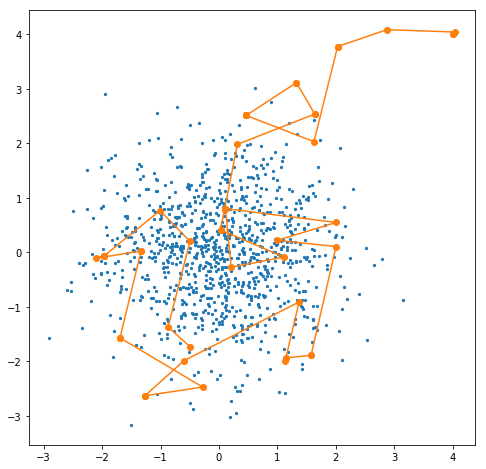

In [273]:
system.viz_trajectory()

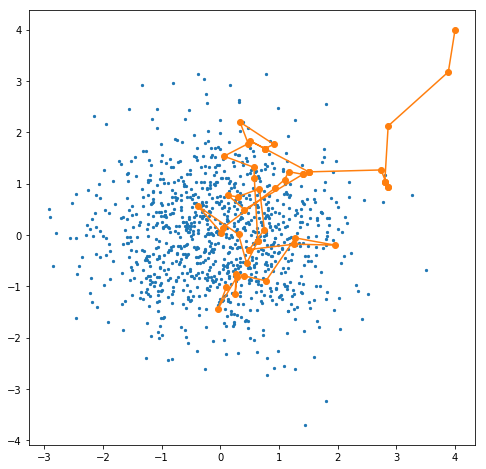

In [274]:
system.viz_trajectory('hmc')

In [128]:
sigma2 = tf.constant([[2, 0], [0, 2]], dtype='float32')

In [133]:
walker.x

<tf.Tensor: id=4694, shape=(1, 2), dtype=float32, numpy=array([[ 1.4754562, -0.8020736]], dtype=float32)>

In [129]:
gaussian2 = Gaussian(mu, sigma2)

In [134]:
x = walker.x
energy_fn = gaussian2.get_energy_fn()
with tf.GradientTape() as g:
    g.watch(x)
    y = energy_fn(x)
dy_dx = g.gradient(y, x)
print(dy_dx)

tf.Tensor([[ 0.7377281 -0.4010368]], shape=(1, 2), dtype=float32)


In [138]:
sigma_n = sigma.numpy()

In [148]:
gaussian.dim

2

In [149]:
p = np.random.multivariate_normal(mean=np.zeros(gaussian.dim),
                                cov=sigma,
                                size=1)[0]

In [143]:
np.zeros(2)

array([0., 0.])

In [110]:
tf.GradientTape?

Init signature: tf.GradientTape(persistent=False)
Docstring:     
Record operations for automatic differentiation.

Operations are recorded if they are executed within this context manager and
at least one of their inputs is being "watched".

Trainable variables (created by `tf.contrib.eager.Variable` or
@{tf.get_variable}, trainable=True is default in both cases) are automatically
watched. Tensors can be manually watched by invoking the `watch` method on
this context manager.

For example, consider the function `y = x * x`. The gradient at `x = 3.0` can
be computed as:

```python
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
dy_dx = g.gradient(y, x) # Will compute to 6.0
```

GradientTapes can be nested to compute higher-order derivatives. For example,

```python
x = tf.constant(3.0)
with tf.GradientTape() as g:
  with tf.GradientTape() as gg:
    gg.watch(x)
    y = x * x
  dy_dx = gg.gradient(y, x)     # Will compute to 6.0
d2y_dx2 = g.gradient(dy_dx, x)

In [83]:
system.initialize_walker()

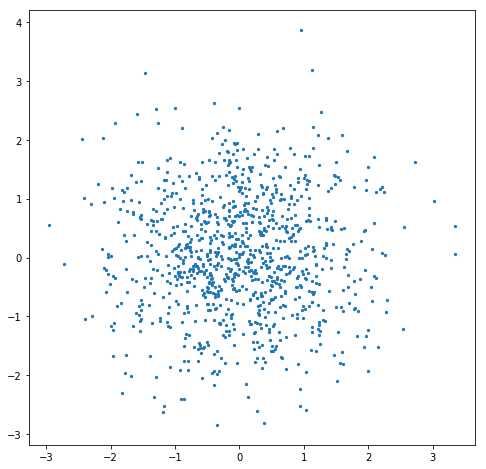

In [87]:
system.viz_dist()

In [94]:
system.evolve(30)

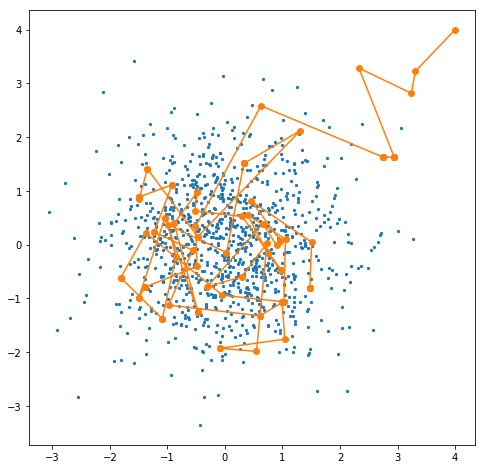

In [95]:
system.viz_trajectory()

In [96]:
sigma.numpy()[:,0]

array([1., 0.], dtype=float32)

In [24]:
en = g.get_energy_fn()

In [39]:
x = tf.constant([[0,0]], dtype='float32')

In [53]:
en(x)

<tf.Tensor: id=94, shape=(1,), dtype=float32, numpy=array([0.5], dtype=float32)>

In [ ]:
tf.diag_part(0.5 * tf.matmul(tf.matmul(x - mu, i_sigma), tf.transpose(x - mu)))

In [18]:
i_sigma = np.linalg.inv(np.copy(sigma))

In [21]:
sigma

<tf.Tensor: id=11, shape=(2, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.]], dtype=float32)>

In [32]:
mu = 

<tf.Tensor: id=22, shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [43]:
mu.get_shape()

TensorShape([Dimension(1), Dimension(2)])

In [54]:
a = tf.tf.matmul(x - mu, sigma)

In [57]:
 exp = tf.diag_part(0.5 * tf.matmul(tf.matmul(x - mu, i_sigma),
                                        tf.transpose(x - mu)))

In [58]:
exp

<tf.Tensor: id=127, shape=(1,), dtype=float32, numpy=array([0.5], dtype=float32)>

In [49]:
t = tf.transpose(x - mu)

In [46]:
x = tf.constant([[1,0]], dtype='float32')

In [50]:
tf.matmul(t, sigma)

InvalidArgumentError: Matrix size-incompatible: In[0]: [2,1], In[1]: [2,2] [Op:MatMul] name: MatMul/

In [63]:
tf.math.exp(x=-exp)

<tf.Tensor: id=132, shape=(1,), dtype=float32, numpy=array([0.60653067], dtype=float32)>

In [71]:
exp

<tf.Tensor: id=127, shape=(1,), dtype=float32, numpy=array([0.5], dtype=float32)>

In [62]:
math.exp(0.5)

1.6487212707001282

In [72]:
from utils.walkers import SingleWalker

In [74]:
w = SingleWalker()

In [75]:
from utils.initializers import ConstantInitializer

In [76]:
init = ConstantInitializer(tf.constant([[0,0]]))

In [77]:
init

In [79]:
init.initialize(w)

In [80]:
w.x

<tf.Tensor: id=144, shape=(1, 2), dtype=int32, numpy=array([[0, 0]], dtype=int32)>

In [ ]:
np.random.multivariate_normal(mean=x,
                                             cov=self.sigma,
                                             size=1)[0]

In [85]:
x = w.x.numpy()
sigma_cov = sigma.numpy()

In [90]:
np.random.multivariate_normal(mean=x[0],
                                             cov=sigma_cov,
                                             size=1)[0]

array([-2.10643794,  1.94987535])

x

In [88]:
x

array([[0, 0]], dtype=int32)

In [91]:
import tensorflow_probability as tfp
tfd = tfp.distributions

ModuleNotFoundError: No module named 'tensorflow_probability'

In [92]:
n = np.array([0,0])

In [93]:
n

array([0, 0])

In [99]:
tf_n = tf.constant([n])

In [100]:
tf_n

<tf.Tensor: id=158, shape=(1, 2), dtype=int32, numpy=array([[0, 0]], dtype=int32)>

In [98]:
tf_n

<tf.Tensor: id=155, shape=(2,), dtype=int64, numpy=array([0, 0])>

In [107]:
a = tf.constant(2)

In [108]:
b = tf.constant(3)

In [109]:
tf.multiply(a, b)

<tf.Tensor: id=169, shape=(), dtype=int32, numpy=6>

In [113]:
a = g.get_density(tf.constant([[1,2]], dtype='float32'))

In [114]:
b = g.get_density(tf.constant([[2,2]], dtype='float32'))

In [115]:
tf.divide(a,b)

<tf.Tensor: id=221, shape=(1,), dtype=float32, numpy=array([4.481689], dtype=float32)>

In [116]:
a

<tf.Tensor: id=204, shape=(1,), dtype=float32, numpy=array([0.082085], dtype=float32)>

In [117]:
b

<tf.Tensor: id=220, shape=(1,), dtype=float32, numpy=array([0.01831564], dtype=float32)>

In [125]:
tf_2 = tf.constant([2], dtype='float32')

In [120]:
tf.multiply(tf_1, b)

<tf.Tensor: id=226, shape=(1,), dtype=float32, numpy=array([0.01831564], dtype=float32)>

In [128]:
tf.minimum(1, tf_2).numpy()[0]

1.0

In [129]:
x = tf.constant([1, 4])
y = tf.constant([2, 5])
z = tf.constant([3, 6])

In [131]:
a = w.x

In [135]:
a = tf.constant([[1,1]], dtype='float32')

In [133]:
b = tf.constant([[2,2]], dtype='float32')

In [140]:
tf.concat([a,b], axis=0)

<tf.Tensor: id=262, shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [2., 2.]], dtype=float32)>

In [98]:
en_fn = gaussian.get_energy_fn()

In [101]:
en_fn(tf.constant([0,1], dtype='float32'))

<tf.Tensor: id=4883, shape=(1,), dtype=float32, numpy=array([0.5], dtype=float32)>

In [102]:
tf.gradients(en_fn, xs=

TypeError: gradients() missing 1 required positional argument: 'xs'

In [104]:
en_fn?

Signature: en_fn(x)
Docstring: <no docstring>
File:      ~/Research/MCMC/utils/distributions.py
Type:      function


In [107]:
w = tf.contrib.eager.Variable([[1.0]])
with tf.GradientTape() as tape:
  loss = w * w

grad = tape.gradient(loss, w)
print(grad)  # => tf.Tensor([[ 2.]], shape=(1, 1), dtype=float32)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


In [105]:
tf.gradients(ys=en_fn, xs=x)

NameError: name 'x' is not defined

In [281]:
nb_mixtures = 3
pis = [0.2, 0.4, 0.4]
n=100

In [282]:
import collections

In [283]:
categorical = np.random.choice(nb_mixtures, size=(n,), p=pis)
counter_samples = collections.Counter(categorical)

In [284]:
categorical

array([1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0,
       1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1,
       0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2])

In [285]:
counter_samples

Counter({1: 44, 0: 16, 2: 40})

In [292]:
a = np.array([[1,2], [0,0], [0,3]])

In [288]:
a.astype('float32')

array([1., 2.], dtype=float32)

In [293]:
len(a)

3

In [294]:
a = np.array([[[1,0],[0,1]], [[1,0],[0,1]]])

In [295]:
len(a)

3

In [296]:
a

array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]]])

In [317]:
from utils.distributions import GMM

In [299]:
mus = np.array([[-4, 0], [4,0]])

In [300]:
sigmas = np.array([[[1,0],[0,1]], [[1,0],[0,1]]])

In [301]:
pis = np.array([0.5, 0.5])

In [318]:
gmm = GMM(mus, sigmas, pis)

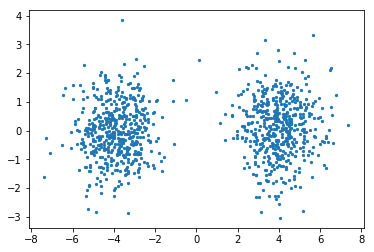

In [321]:
gmm.viz(1000)